In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from agots.multivariate_generators.multivariate_data_generator import MultivariateDataGenerator

/home/madness/.local/lib/python3.5/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


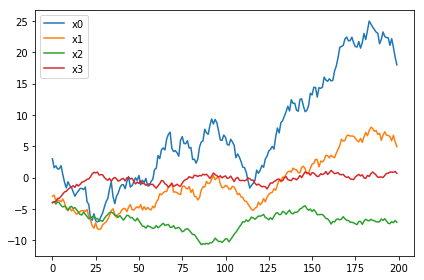

,x0,x1,x2,x3
x0,1.000000,0.993202,-0.056126,0.460917
x1,0.993202,1.000000,-0.053251,0.458618
x2,-0.056126,-0.053251,1.000000,-0.324967
x3,0.460917,0.458618,-0.324967,1.000000


In [4]:
np.random.seed(1337)

STREAM_LENGTH = 200
N = 4
K = 2

dg = MultivariateDataGenerator(STREAM_LENGTH, N, K)
df = dg.generate_baseline(initial_value_min=-4, initial_value_max=4)

for col in df.columns:
    plt.plot(df[col], label=col)
plt.legend()
plt.show()

df.corr()

/home/madness/.local/lib/python3.5/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


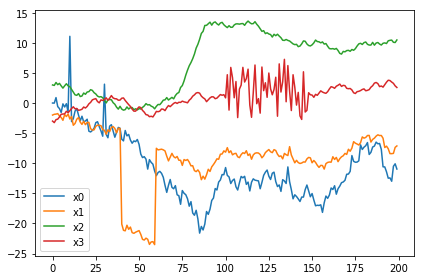

In [18]:
df = dg.generate_baseline(initial_value_min=-4, initial_value_max=4)
df = dg.add_outliers({'extreme': [{'n': 0, 'timestamps': [(10,), (30,)],
                                   'factor': 10
                                  }],
                      'shift':   [{'n': 1, 'timestamps': [(40, 60)],
                                   'factor': 10
                                  }],
                      'trend':   [{'n': 2, 'timestamps': [(70, 90)],
                                   'factor': 5
                                  }],
                      'variance':[{'n': 3, 'timestamps': [(100, 150)],
                                   'factor': 10
                                  }]})

for col in df.columns:
    plt.plot(df[col], label=col)
plt.legend()
plt.show()